# Logistic Regression
In this exercise, you will implement logistic regression and get to see it work on data.

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

## Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. The code will load the data and display it on a 2-dimensional plot by calling the function plotData.
plotData displays a figure, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt('ex2data1.txt', delimiter=',') #load the data
X = data[:, :2] # two scores
y = data[:, 2] # admited 
m = len(y)     # number of samples 

#Just for indexing purposes
X = X.reshape(m,2)
y = y.reshape(m,1)

#see the values for y
print(y[:5])

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [14]:
def plotData(X, y):
    '''PLOTDATA Plots the data points X and y into a new figure 
       PLOTDATA(x,y) plots the data points with + for the positive examples
       and o for the negative examples. X is assumed to be a Mx2 matrix.
    '''

    # Find Indices of Positive and Negative Examples 
    pos = np.where(y==1)
    neg = np.where(y == 0)
    # Plot Examples 
    posplot = plt.scatter(X[pos, 0], X[pos, 1], marker='+', label='Admitted') 
    negplot = plt.scatter(X[neg, 0], X[neg, 1], marker='o', label='Not admitted') 
    # Labels and Legend
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    # Specified in plot order
    plt.legend()

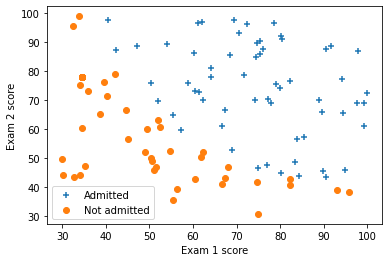

In [15]:
plotData(X,y)

## sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:
$$ h_\theta(x) = g(\theta^T x), $$
where function $g$ is the sigmoid function. The sigmoid function is defined as:
$$ g(z) = \frac{1}{1+e^{−z}} $$
Your first step is to implement this function so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [16]:
def sigmoid(z):
    '''
        SIGMOID Compute sigmoid functoon
        J = SIGMOID(z) computes the sigmoid of z.
    '''

    # You need to return the following variables correctly 
    if not isinstance(z, np.ndarray):
        z = np.array(z)
    one = np.ones(z.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    #               vector or scalar).

    g = np.divide(one, 1 + np.exp(-z))
    return g

In [17]:
print(sigmoid(100))
print(sigmoid(-100))
print(sigmoid(0))
print(sigmoid([100, -100, 0]))

1.0
3.7200759760208356e-44
0.5
[1.00000000e+00 3.72007598e-44 5.00000000e-01]


## Gradient Descent
In this part, you will fit the logistic regression parameters θ to our dataset using gradient descent.

### Update Equations
The objective of linear regression is to minimize the cost function

$$ J(\theta)= \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)} \log (h_\theta(x^{(i)})) − (1-y^{(i)})\log (1-h_\theta(x^{(i)}))] $$

where the hypothesis $h_\theta(x)$ is given by the logistic model
$$ h_\theta(x) = g(\theta^T x). $$

the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,\ldots,n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h\theta(x^{(i)}) − y^{(i)})x^{(i)}_j $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [18]:
def costFunction(theta, X, y):
    '''
        COSTFUNCTION Compute cost and gradient for logistic regression
        J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
        parameter for logistic regression and the gradient of the cost
        w.r.t. to the parameters.
    '''

    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape);
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Note: grad should have the same dimensions as theta
    theta = theta.reshape(theta.size,1)
    h = sigmoid(np.dot(X,theta))
    dif1 = -y*np.log(h) - (1-y)*np.log(1-h)
    J = (1/m) * np.sum(dif1)

    dif2 = np.dot(X.T,h-y)
    grad = 1/m * dif2

    return J.item(), grad


In [19]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X = np.concatenate((np.ones((m,1)), X), axis=1) # Add a column of ones to x

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)

# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): ', cost)
print('Gradient at initial theta (zeros): ', grad);


Cost at initial theta (zeros):  0.6931471805599453
Gradient at initial theta (zeros):  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [23]:
# Using scipy optimize the cost function
from scipy.optimize import fmin_tnc

#  Run fmin_bfgs to obtain the optimal theta
#  This function will return theta and the cost 
solution = fmin_tnc(costFunction, initial_theta, args=(X, y),maxfun=400)
theta = solution[0]
cost, grad = costFunction(theta, X, y)
# Print theta to screen
print('Cost at theta found by fminunc: ', cost)
print('theta: ', theta)


Cost at theta found by fminunc:  0.20349770158947414
theta:  [-25.16131871   0.20623159   0.20147149]


In [46]:
def plotDecisionBoundary(theta, X, y):
    '''
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta
       PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
       positive examples and o for the negative examples. X is assumed to be 
       a Mx3 matrix, where the first column is an all-ones column for the 
       intercept.
    '''
    plotData(X[:,1:], y)

    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X[:,1])-2,  np.max(X[:,1])+2])

    # Calculate the decision boundary line
    plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])

    # Plot, and adjust axes for better viewing
    plt.plot(plot_x, plot_y,'r',label='Decision Boundary')
    
    # Legend, specific for the exercise
    plt.legend()

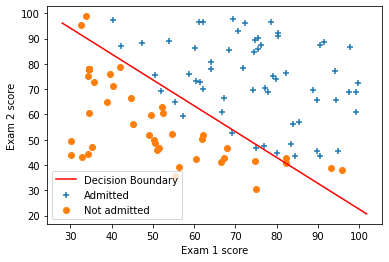

In [47]:
#Plot Boundary
plotDecisionBoundary(theta, X, y)